<h1>Classical methods (X12 - ARMA - ARIMA) </h1>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.x13 import x13_arima_analysis
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from production_code import constants
from production_code import metrics

In [1]:
import os
os.getcwd()
os.chdir('../')
os.getcwd()

'C:\\Users\\aniss\\source\\repos\\ExcelAddIn1\\ExcelAddin\\WaveletForecasting'

In [4]:
series = pd.read_excel(io="data/eurusd.xlsx",header=0, index_col=0).dropna()
series.head()

,PX_LAST
Date,
2007-01-01,1.3201
2007-01-02,1.3273
2007-01-03,1.3169
2007-01-04,1.3084
2007-01-05,1.3002


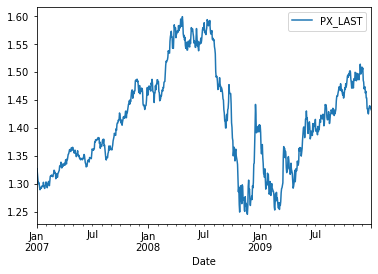

In [5]:
series.plot()

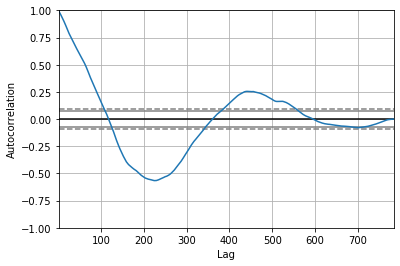

In [6]:
autocorrelation_plot(series)

In [6]:
result = adfuller (series ['PX_LAST']) 
result[4].items()
print ('Augmented Dyckey Fuller Statistic: {}'. format (result [0])) 
print ('p-value: {}'. format (result [1]))
print ('Critical Values:') 
for key, value in result [4].items (): 
        print ('\t {}: {}'. format (key, value))

Augmented Dyckey Fuller Statistic: -1.5674855415745423
p-value: 0.49990292277518344
Critical Values:
	 1%: -3.4404504809576695
	 5%: -2.8659967824852073
	 10%: -2.569143417751479


La serie n'est pas stationnaire d'après le test de DF, utilisation d'ARIMA

<h2>ARIMA</h2>

In [10]:
def arima_forecast(series, nb_days, i) -> np.array:
    
    values = series.count()
    train = series.iloc[:values[0] - nb_days]
    actual = series.iloc[values[0] - nb_days:]

    AIC = np.zeros((6, 6))
    for p in range(0, 6):
        for q in range(0, 6):
            model = ARIMA(series.iloc[:values[0] - nb_days], order=(p, i, q))
            try:
                results = model.fit()
                AIC[p][q] = results.aic
            except:
                AIC[p][q] = 100000
    p = np.where(AIC == (AIC.min()))[0][0]
    q = np.where(AIC == (AIC.min()))[1][0]
    #p = 1
    #q = 1

    model = ARIMA(series.iloc[:values[0] - nb_days], order=(p, i, q))
    fitted = model.fit()
    print(fitted.summary())
    fc, se, conf = fitted.forecast(nb_days, alpha=0.05)
    forecast = pd.Series(fc, index=actual.index)
    lower_series = pd.Series(conf[:, 0], index=actual.index)
    upper_series = pd.Series(conf[:, 1], index=actual.index)
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train, label='Past')
    plt.plot(actual, label='Actuel')
    plt.plot(forecast, label='Forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series,
                     color='k', alpha=.15)
    plt.title('Predictions graphes')
    plt.legend(loc='upper left', fontsize=6)
    plt.show()

    mad = metrics.MAD(actual.iloc[:,0], forecast)
    rmse = metrics.RMSE(actual.iloc[:,0], forecast)
    mape = np.mean(np.abs(forecast - actual.iloc[:,0])/np.abs(actual).iloc[:,0])  # MAPE

    return {'MAD': mad, 'RMSE': rmse, 'MAPE': mape}

C:\Users\aniss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\aniss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\aniss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\aniss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\aniss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\aniss\

                              ARMA Model Results                              
Dep. Variable:                PX_LAST   No. Observations:                  647
Model:                     ARMA(4, 3)   Log Likelihood                2062.596
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sun, 19 Apr 2020   AIC                          -4107.192
Time:                        19:21:15   BIC                          -4066.941
Sample:                    01-01-2007   HQIC                         -4091.577
                         - 06-23-2009                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4203      0.012    118.271      0.000       1.397       1.444
ar.L1.PX_LAST     1.6452      0.004    401.271      0.000       1.637       1.653
ar.L2.PX_LAST    -1.2598      0.045    -

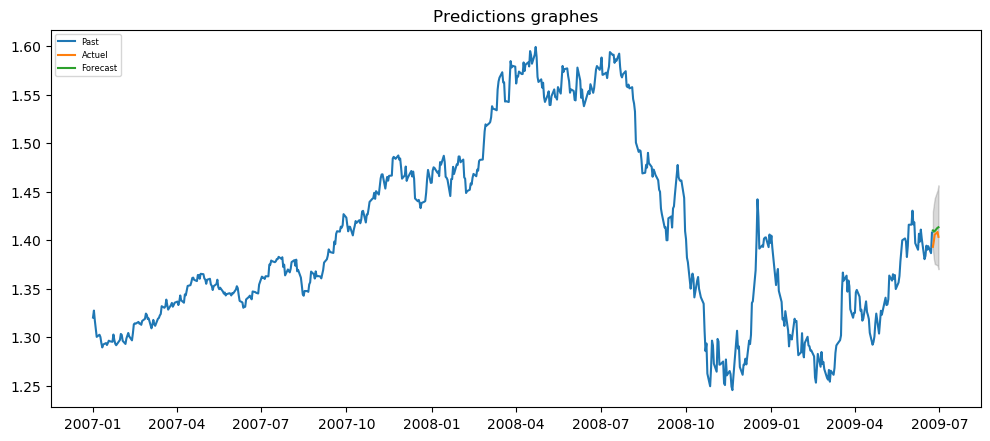

{'MAD': 0.09452836652160641,
 'RMSE': 0.01015050769576885,
 'MAPE': 0.006386948070804985}

In [12]:
arima_forecast(series,5,0)

<h2>X12</h2>

b''


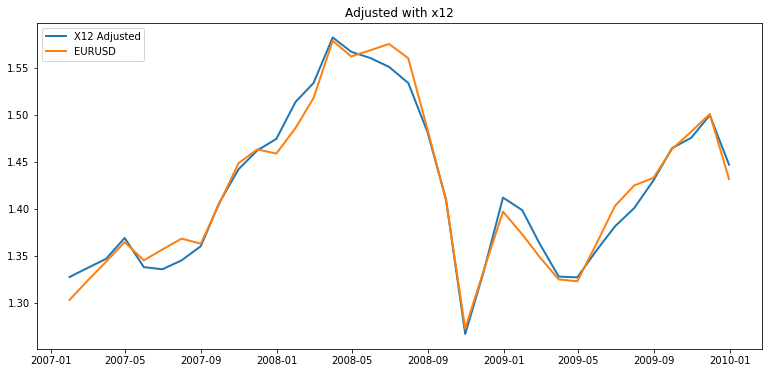

In [27]:
XPATH = os.chdir('C:\\Users\\aniss\\Desktop\\WinX13\\x13as')

adjusted = pd.DataFrame(series.values,index=series.index).resample("M").interpolate().dropna()
#adjusted = pd.DataFrame(series.values,index=series.index)
#adjusted = sm.tsa.seasonal_decompose(adjusted)
adjusted

x12x12 = x13_arima_analysis(endog = adjusted,x12path=XPATH, outlier=True,print_stdout=True)

df = pd.Series(x12x12.seasadj.values,index=adjusted.index.values)
df=df.to_frame()
df.columns=["Adjusted"]
os.chdir(os.getcwd())

fig, ax = plt.subplots(figsize=(13,6))
ax.set_title("Adjusted with x12")
ax.plot(df.index,df["Adjusted"],linewidth=2, label="X12 Adjusted")
ax.plot(adjusted.index,adjusted,linewidth=2, label="EURUSD")
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [46]:
mad = metrics.MAD(adjusted.iloc[:,0], df.iloc[:,0])
rmse = metrics.RMSE(adjusted.iloc[:,0], df.iloc[:,0])
mape = np.mean(np.abs(df.iloc[:,0] - adjusted.iloc[:,0])/np.abs(df).iloc[:,0])  # MAPE
print ('MAD', mad)
print('RMSE', rmse)
print('MAPE', mape)

MAD 0.10378890446733297
RMSE 0.01405200911196606
MAPE 0.007579464399817907
